# PDI - Trabalho 3

- Data: 10/2020
- Nome: Bruna Medeiros da Silva
- Matrícula: 16/0048711

- Professor: Renan Utida
- Matéria: Processamento Digital de Imagens

In [15]:
# Importing Data

import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1st Question: Homomorphic filtering

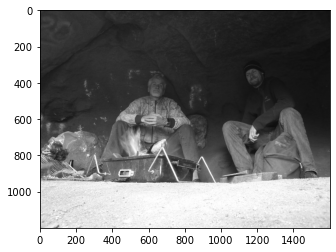

In [16]:
img_mussels = cv2.imread("imagens_5_freq/mussels_cave_050.JPG")
plt.imshow(img_mussels)
if(len(img_mussels.shape) > 2):
    img_mussels = cv2.cvtColor(img_mussels, cv2.COLOR_BGR2GRAY)

In [26]:
from scipy import signal
from numpy.fft import fft2, ifft2, fftshift, ifftshift
# from skimage.transform import rescale

## HP: gamma_L < 1, gamma_H > 1
## Reduce ilumination component and increase refraction component

## P >= M
## Q >= N

def img_filtering(image, gamma_H = 2, gamma_L = 0.25, c = 1, D_0 = 80):
    fft_image = fftshift(fft2(image))

    M, N = fft_image.shape
    P = M
    Q = N
    H = np.zeros(fft_image.shape)
    
    for u in range(M):
        for v in range(N):
            D = ((u - (P/2))**2 + (v - (Q/2))**2)**(1 / 2)
            H[u][v] = (gamma_H - gamma_L) * (1 - np.exp(- c * (D**2 / (D_0**2)))) + gamma_L
            
    
    filt_fft_img = fft_image * H
    filtered_img = ifft2(ifftshift(filt_fft_img))
    return filtered_img, H

def homomorfic_filter(image, gamma_H = 2, gamma_L = 0.25, c = 1, D_0 = 80, tol = 1e-3):
    if(len(image.shape) > 2):
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        
    new_image = np.zeros(image.shape).astype(np.float)
    freq_filter = np.zeros(image.shape)
    
    log_image = image + tol
#     print(log_image.min())
    log_image = np.log(log_image)    
    
    img_filtered, freq_filter = img_filtering(log_image, gamma_H = gamma_H, gamma_L = gamma_L, c = c, D_0 = D_0)
    img_filtered = np.exp(np.real(img_filtered))
    img_filtered = img_filtered * 255 / img_filtered.max()
    new_image = image + img_filtered
    new_image = np.floor(new_image * 255 / new_image.max())
#     print(new_image)
    return new_image.astype(np.uint8), freq_filter, img_filtered


def plot_results_1(original_img, freq_filter, new_img, added_img, hspace = -0.5, tol = 1e-3, fig_name = 'fig_pdi'):
    fig, axs = plt.subplots(2, 3, figsize = [15, 15])
    fig.subplots_adjust(hspace = hspace)
    
    axs[0][0].imshow(original_img, cmap = 'gray', vmin = 0, vmax = 255)
    axs[0][0].set_title('Original')
    
    axs[0][1].set_title('Filtered Image (gray)')
    axs[0][1].imshow(added_img, cmap = 'gray', vmin = 0, vmax = 255)
    
    axs[0][2].set_title('Result')
    axs[0][2].imshow(new_img, cmap = 'gray', vmin = 0, vmax = 255)
    
    axs[1][0].set_title('Original Spectrum')
    axs[1][0].imshow(20*np.log10(np.abs(fftshift(fft2(original_img))) + tol), cmap = 'gray')
    
    axs[1][1].set_title('Homomorfic Filter $H(u, v)$')
    axs[1][1].imshow(20*np.log10(freq_filter), cmap = 'jet')
    
    axs[1][2].set_title('Resulting Spectrum')
    axs[1][2].imshow(20*np.log10(np.abs(fftshift(fft2(new_img))) + tol), cmap = 'gray')
    
    plt.savefig(fig_name+'.png')

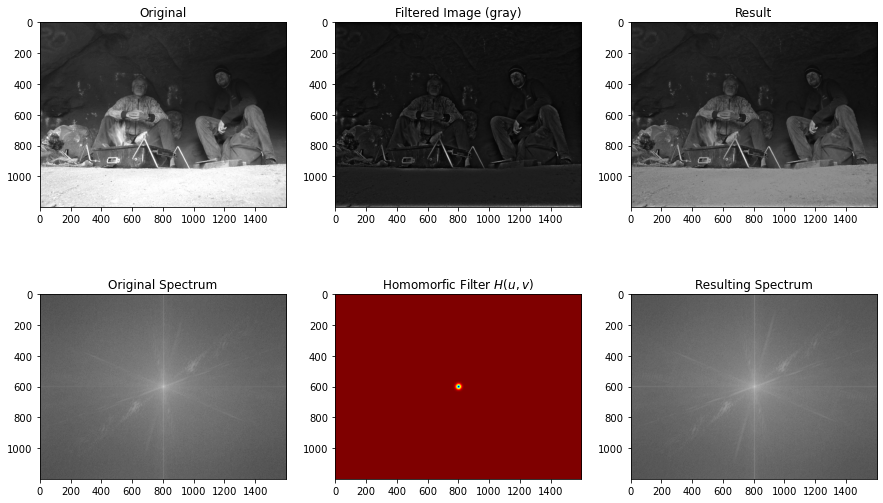

In [27]:
filtered_mussels, filter_mussels, added_mussels = homomorfic_filter(img_mussels, 
                                                  gamma_H = 2, gamma_L = 0.25, c = 3, D_0 = 30)

plot_results_1(img_mussels, 
             filter_mussels, 
             filtered_mussels, 
             added_mussels, 
             fig_name = 'q1_mussels')

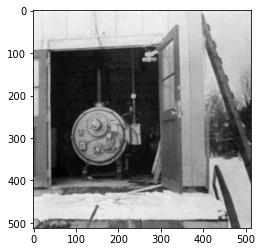

In [28]:
img_shelter = cv2.imread("imagens_5_freq/shelter_homomorphic.bmp")
if(len(img_shelter.shape) > 2):
    img_shelter = cv2.cvtColor(img_shelter, cv2.COLOR_BGR2GRAY)
plt.imshow(img_shelter, cmap = 'gray')

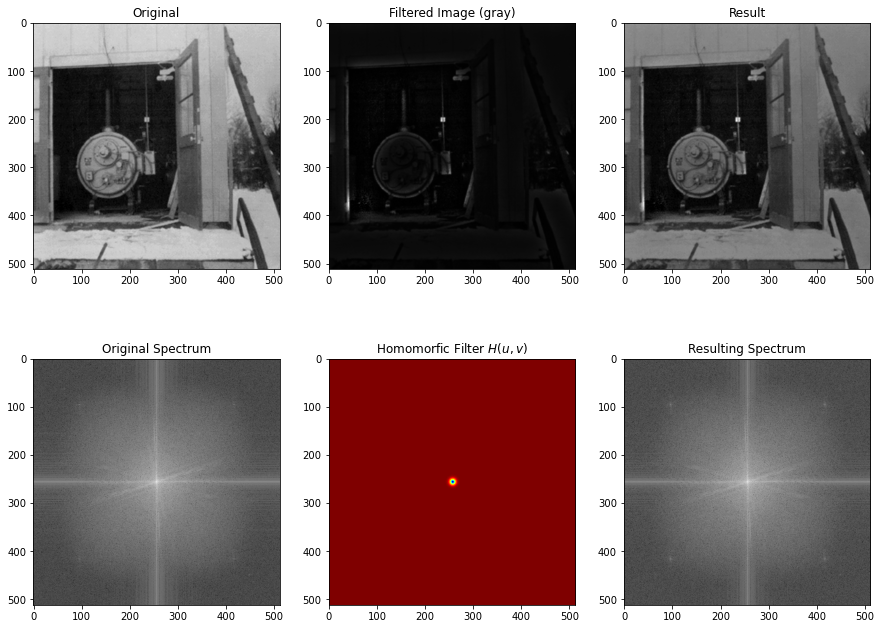

In [29]:
filtered_shelter, filter_shelter, added_shelter = homomorfic_filter(img_shelter, 
                                                  gamma_H = 2, gamma_L = 0.25, c = 8, D_0 = 20)

plot_results_1(img_shelter, 
             filter_shelter, 
             filtered_shelter, 
             added_shelter,
             hspace = - 0.3,
             fig_name = 'q1_shelter')

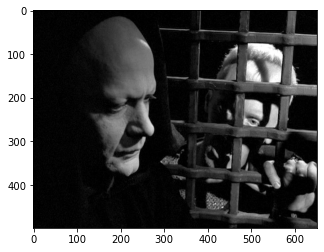

In [30]:
img_seal = cv2.imread("imagens_5_freq/The_Seventh_Seal_1.jpg")

if(len(img_seal.shape) > 2):
    img_seal = cv2.cvtColor(img_seal, cv2.COLOR_BGR2GRAY)
    
plt.imshow(img_seal, cmap = 'gray')

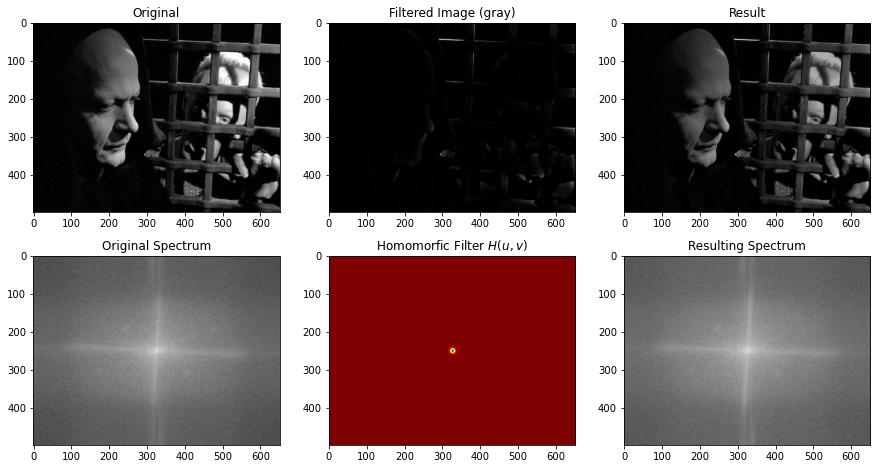

In [31]:
filtered_seal, filter_seal, added_seal = homomorfic_filter(img_seal, 
                                                  gamma_H = 1.5, gamma_L = 0.25, c = 5, D_0 = 15)

plot_results_1(img_seal, 
             filter_seal, 
             filtered_seal, 
             added_seal,
             hspace = - 0.6,
             fig_name = 'q1_seal')

# 2nd Question: Notch Filter

<Figure size 432x288 with 0 Axes>

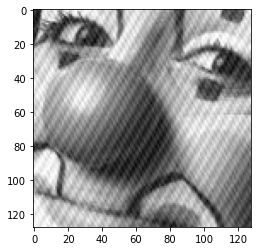

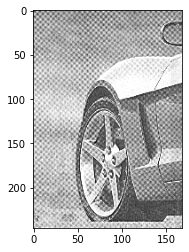

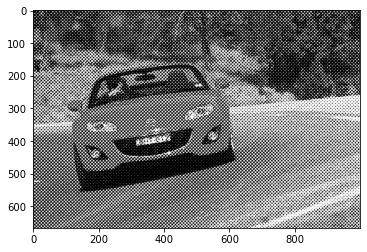

In [32]:
clown_img = cv2.imread('imagens_5_freq/clown_notch.jpg')
plt.figure()
plt.subplots()
plt.imshow(clown_img)

car_img = cv2.imread('imagens_5_freq/Fig0464(a)(car_75DPI_Moire).tif')
plt.figure()
plt.imshow(car_img)

halftone_img = cv2.imread('imagens_5_freq/halftone.png')
plt.figure()
plt.imshow(halftone_img)

In [34]:
def notch_filter(img, D_0 = 5, uk = -80, vk = 30, n = 1, dist_y = 40, dist_x = 0, plot = True, hspace = -0.5, filt_zeros = False, fig_name = 'fig_pdi'):
    if(len(img.shape) > 2):
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    fft_img = fftshift(fft2(img)) 
    
    M, N = fft_img.shape
    
    H = np.zeros([M, N])
    final_H = np.ones([M, N])
    
    u, v = np.meshgrid(range(M), range(N), sparse=False, indexing='ij');

    for k in range(n):    
        Dk  = np.sqrt((u - (M/2) - uk)**2 + (v - (N/2) - vk)**2)
        D_k = np.sqrt((u - (M/2) + uk)**2 + (v - (N/2) + vk)**2)
        Dk[Dk == 0] = 0.000001
        D_k[D_k == 0] = 0.000001

        H = (1 / (1 + (D_0/Dk)**(2*n))) * (1 / (1 + (D_0/D_k)**(2*n)))
        final_H = final_H * H

        if(((uk + dist_y) != 0 or filt_zeros) and ((vk + dist_x) != 0 or (uk + dist_y != 0))):
            uk = uk + dist_y
        else:
            uk = uk + (2 * dist_y)

        if(((vk + dist_x) != 0 or filt_zeros) and ((vk + dist_x) != 0 or (uk != 0))):
            vk = vk + dist_x
        else:
            vk = vk + (2 * dist_x)
             
                
        
    filtered_fft_img = fft_img * final_H
    filtered_img = abs(ifft2(ifftshift(filtered_fft_img)))
    filtered_img = (filtered_img * 255 / filtered_img.max()).astype(np.uint8)
    
    if(plot):
        plot_results_2(img, 
                       final_H, 
                       filtered_img, 
                       hspace = hspace,
                       fig_name = fig_name)
    
    return filtered_img, final_H

def plot_results_2(original_img, freq_filter, new_img, hspace = -0.5, tol = 1e-3, fig_name = 'fig_pdi'):
    if(len(original_img.shape) > 2):
        original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2GRAY)
        
    fig, axs = plt.subplots(2, 3, figsize = [10, 10])
    fig.subplots_adjust(hspace = hspace)
    
    axs[0][0].imshow(original_img, cmap = 'gray', vmin = 0, vmax = 255)
    axs[0][0].set_title('Original')
    
    axs[0][1].set_title('Filter - Gray Scale')
    axs[0][1].imshow(20*np.log10(freq_filter), cmap = 'gray')
    
    axs[0][2].set_title('Filtered Image')
    axs[0][2].imshow(new_img, cmap = 'gray', vmin = 0, vmax = 255)
    
    axs[1][0].set_title('Original Spectrum')
    axs[1][0].imshow(20*np.log10(np.abs(fftshift(fft2(original_img))) + tol), cmap = 'gray')
    
    axs[1][1].set_title('Filter $H(u, v)$ - temperature')
    axs[1][1].imshow(20*np.log10(freq_filter), cmap = 'jet')
    
    axs[1][2].set_title('Resulting Spectrum')
    axs[1][2].imshow(20*np.log10(np.abs(fftshift(fft2(new_img))) + tol), cmap = 'gray')
    
    plt.savefig(fig_name + '.png')


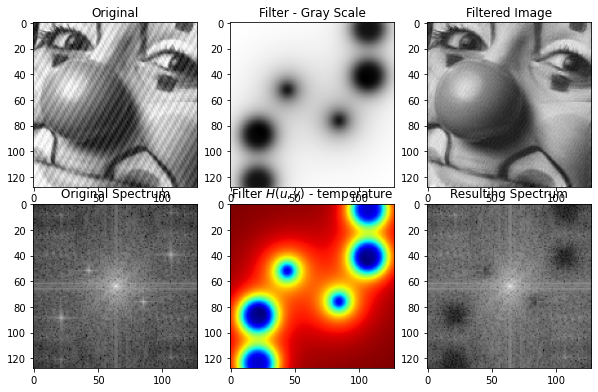

In [41]:
if(len(clown_img.shape) > 2):
    clown_img = cv2.cvtColor(clown_img, cv2.COLOR_BGR2GRAY)

filter_clown = np.zeros(clown_img.shape)

filtered_clown,filter_tmp = notch_filter(clown_img, uk = -12, vk = -20, D_0 = 10, n = 1, dist_y = 40, dist_x = 0, plot = False)
filter_clown = filter_clown + filter_tmp 

filtered_clown,filter_tmp = notch_filter(filtered_clown, uk = -60, vk = 43,  D_0 = 15, n = 2, dist_y = 37, dist_x = 0, hspace = - 0.3, plot = False)
filter_clown = filter_clown + filter_tmp

filter_clown = filter_clown * 255 / filter_clown.max()

plot_results_2(clown_img, filter_clown, filtered_clown, fig_name = 'filtered_clown')

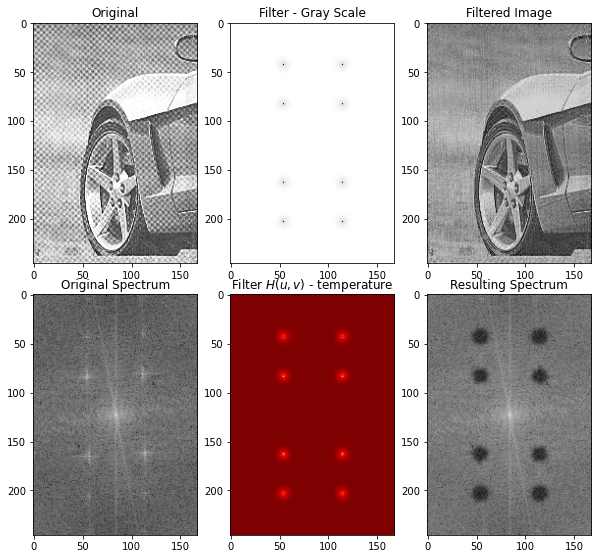

In [38]:
filtered_car,_ = notch_filter(car_img, uk = -80, vk = 30, D_0 = 10, n = 4, dist_y = 40, dist_x = 0, hspace = 0, fig_name = 'filtered_car')
# filtered_car = notch_filter(filtered_car, uk =  40, vk = 30, D_0 = 10, n = 2, dist_y = 40, dist_x = 0)

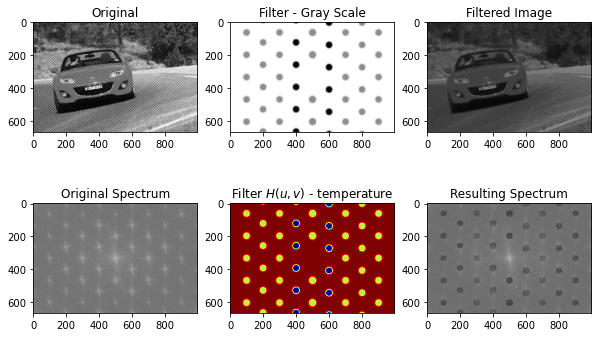

In [39]:
# filter_halftone = np.zeros(halftone_img.shape)

filtered_halftone, filter_halftone = notch_filter(halftone_img, uk = -345, vk = -100, D_0 = 20, n = 6, 
                                 dist_y = 135, dist_x = 0, hspace = -0.6, filt_zeros = True, plot = False)
filtered_halftone, tmp_filter = notch_filter(filtered_halftone, uk = -345, vk = -100, D_0 = 20, n = 6, 
                                 dist_y = 135, dist_x = 0, hspace = -0.6, filt_zeros = True, plot = False)
filter_halftone = filter_halftone + tmp_filter


filtered_halftone, tmp_filter = notch_filter(filtered_halftone, uk = -270, vk = -200, D_0 = 20, n = 5, 
                                 dist_y = 135, dist_x = 0, hspace = -0.6, filt_zeros = True, plot = False)
filter_halftone = filter_halftone + tmp_filter


filtered_halftone, tmp_filter = notch_filter(filtered_halftone, uk = -345, vk = -300, D_0 = 20, n = 6, 
                                 dist_y = 135, dist_x = 0, hspace = -0.6, filt_zeros = True, plot = False)
filter_halftone = filter_halftone + tmp_filter


filtered_halftone, tmp_filter = notch_filter(filtered_halftone, uk = -270, vk = -400, D_0 = 20, n = 5, 
                                 dist_y = 135, dist_x = 0, hspace = -0.6, filt_zeros = True, plot = False)
filter_halftone = filter_halftone + tmp_filter


filtered_halftone, tmp_filter = notch_filter(filtered_halftone, uk = -270, vk = 0, D_0 = 20, n = 5, 
                                 dist_y = 135, dist_x = 0, hspace = -0.6, filt_zeros = True, plot = False)
filter_halftone = filter_halftone + tmp_filter

filter_halftone = (np.round(filter_halftone * 255 / filter_halftone.max()))


plot_results_2(halftone_img, filter_halftone, filtered_halftone, fig_name = 'filtered_halftone')